# Class 7 - Solution Code

In [40]:
import numpy as np
import pandas as pd
import seaborn as sns

%matplotlib inline

# Part 1: Mean Squared Error (MSE) Loss Function

API Docs for [sklearn.linear_model.LinearRegression](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html)

API Docs for [sklearn.metrics.mean_squared_error](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html)

### Create sample data and fit a model

In [17]:
# import scikit-learn linear model for Linear Regression
from sklearn import linear_model

# import scikit-learn metrics for MSE
from sklearn import metrics

# generate synthetic data
df = pd.DataFrame({'x': range(100), 'y': range(100)})

# generate biased copy
biased_df  = df.copy()
biased_df.loc[:20, 'y'] = 20

# add jitter to both
def append_jitter(series):
    jitter = np.random.random_sample(size=100)
    return series + jitter

df['x'] = append_jitter(df['x'])
df['y'] = append_jitter(df['y'])

biased_df['x'] = append_jitter(biased_df['x'])
biased_df['y'] = append_jitter(biased_df['y'])

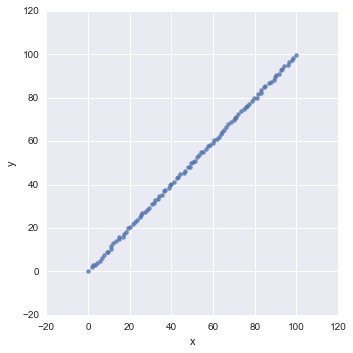

In [18]:
## plot unbiased
sns.lmplot(x="x", y="y", data=df, fit_reg=False);

In [19]:
# fit unbiased
lm = linear_model.LinearRegression().fit(df[['x']], df['y'])
print metrics.mean_squared_error(df['y'], lm.predict(df[['x']]))

0.165839920841


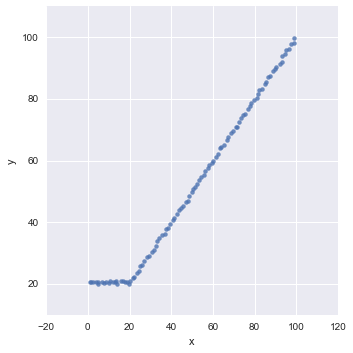

In [20]:
# plot biased
sns.lmplot(x="x", y="y", data=biased_df, fit_reg=False);

In [21]:
# fit biased
lm = linear_model.LinearRegression().fit(biased_df[['x']], biased_df['y'])
print metrics.mean_squared_error(df['y'], lm.predict(df[['x']]))

13.643557512


# Part 2: Cross Validation

API Docs for [sklearn.cross_validation.KFold](http://scikit-learn.org/stable/modules/generated/sklearn.cross_validation.KFold.html)

### Intro to cross validation with bike share data from last time. We will be modeling casual ridership. 

In [29]:
# import cross validation
from sklearn import cross_validation

# load bikeshare dataset
wd = '../../assets/dataset/bikeshare/'
bikeshare = pd.read_csv(wd + 'bikeshare.csv')

### Create dummy variables and set outcome (dependent) variable

In [30]:
# get dummy variables for weathersit
X = bikeshare[['temp', 'hum']].join(pd.get_dummies(bikeshare['weathersit'], prefix='weathersit'))

# set dependent variable
y = bikeshare['casual'] 

In [31]:
X.head()

,temp,hum,weathersit_1,weathersit_2,weathersit_3,weathersit_4
0,0.24,0.81,1.0,0.0,0.0,0.0
1,0.22,0.80,1.0,0.0,0.0,0.0
2,0.22,0.80,1.0,0.0,0.0,0.0
3,0.24,0.75,1.0,0.0,0.0,0.0
4,0.24,0.75,1.0,0.0,0.0,0.0


### Create a cross valiation with 5 folds

In [32]:
kf = cross_validation.KFold(len(X), n_folds=5, shuffle=True)

In [33]:
#below, the purple of kfolds is to so you can assess multiple values at the same time

In [34]:
mse_values = []
scores = []
n= 0
print "~~~~ CROSS VALIDATION each fold ~~~~"
for train_index, test_index in kf:
    lm = linear_model.LinearRegression().fit(X.iloc[train_index], y.iloc[train_index])
    mse_values.append(metrics.mean_squared_error(y.iloc[test_index], lm.predict(X.iloc[test_index])))
    scores.append(lm.score(X, y))
    n+=1
    print 'Model', n
    print 'MSE:', mse_values[n-1]
    print 'R2:', scores[n-1]


print "~~~~ SUMMARY OF CROSS VALIDATION ~~~~"
print 'Mean of MSE for all folds:', np.mean(mse_values)
print 'Mean of R2 for all folds:', np.mean(scores)

~~~~ CROSS VALIDATION each fold ~~~~
Model 1
MSE: 1845.59946385
R2: 0.31186012949
Model 2
MSE: 1604.08475999
R2: 0.311884530963
Model 3
MSE: 1637.77412652
R2: 0.311839498023
Model 4
MSE: 1539.99868927
R2: 0.31183359403
Model 5
MSE: 1743.78670969
R2: 0.311852395364
~~~~ SUMMARY OF CROSS VALIDATION ~~~~
Mean of MSE for all folds: 1674.24874986
Mean of R2 for all folds: 0.311854029574


In [35]:
lm = linear_model.LinearRegression().fit(X, y)
print "~~~~ Single Model ~~~~"
print 'MSE of single model:', metrics.mean_squared_error(y, lm.predict(X))
print 'R2: ', lm.score(X, y)

~~~~ Single Model ~~~~
MSE of single model: 1672.61349152
R2:  0.311921283932


### Check
While the cross validated approach here generated more overall error, which of the two approaches would predict new data more accurately: the single model or the cross validated, averaged one? Why?

**Answer**: on new data, creating separate models is a way to force generalization. if you do multiple models 

# Part 3: Regularization

API Docs for [sklearn.linear_model.Lasso](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html)

API Docs for [sklearn.linear_model.Ridge](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html)

### Effects of Regularization on MSE and R2

In [36]:
# fit linear regression using no regularization (OLS)
lm = linear_model.LinearRegression().fit(X, y)
print "~~~ No regularization (OLS) ~~~"
print 'OLS MSE: ', metrics.mean_squared_error(y, lm.predict(X))
print 'OLS R2:', lm.score(X, y)

# fit linear regression using L1 regularization (Lasso)
lm = linear_model.Lasso().fit(X, y)
print "~~~ L1 regularization (Lasso) ~~~"
print 'Lasso MSE: ', metrics.mean_squared_error(y, lm.predict(X))
print 'Lasso R2:', lm.score(X, y)

# fit linear regression using L2 regularization (Ridge)
lm = linear_model.Ridge().fit(X, y)
print "~~~ L2 regularization (Ridge) ~~~"
print 'Ridge MSE: ', metrics.mean_squared_error(y, lm.predict(X))
print 'Ridge R2:', lm.score(X, y)

~~~ No regularization (OLS) ~~~
OLS MSE:  1672.61349152
OLS R2: 0.311921283932
~~~ L1 regularization (Lasso) ~~~
Lasso MSE:  1725.41581608
Lasso R2: 0.290199495922
~~~ L2 regularization (Ridge) ~~~
Ridge MSE:  1672.58654779
Ridge R2: 0.311932368028


### Figuring out the alphas can be done by "hand"

In [37]:
alphas = np.logspace(-10, 10, 21)
for a in alphas:
    print 'Alpha:', a
    lm = linear_model.Ridge(alpha=a)
    lm.fit(X, y)
    print metrics.mean_squared_error(y, lm.predict(X))

Alpha: 1e-10
1672.58110765
Alpha: 1e-09
1672.58110765
Alpha: 1e-08
1672.58110765
Alpha: 1e-07
1672.58110765
Alpha: 1e-06
1672.58110765
Alpha: 1e-05
1672.58110765
Alpha: 0.0001
1672.58110765
Alpha: 0.001
1672.58110766
Alpha: 0.01
1672.5811084
Alpha: 0.1
1672.5811796
Alpha: 1.0
1672.58654779
Alpha: 10.0
1672.80670147
Alpha: 100.0
1686.31503389
Alpha: 1000.0
1937.81579642
Alpha: 10000.0
2314.83668868
Alpha: 100000.0
2415.77805501
Alpha: 1000000.0
2429.28026347
Alpha: 10000000.0
2430.68891787
Alpha: 100000000.0
2430.83041211
Alpha: 1000000000.0
2430.84456787
Alpha: 10000000000.0
2430.84598351


# Part 4: Grid Search

API Docs for [sklearn.grid_search.GridSearchCV](http://scikit-learn.org/stable/modules/generated/sklearn.grid_search.GridSearchCV.html)

### Or we can use grid search to find alpha

In [39]:
# import grid search
from sklearn import grid_search

# pick range of values to search with
alphas = np.logspace(-10, 10, 21)

# use grid search CV to find best value
gs = grid_search.GridSearchCV(
    estimator=linear_model.Ridge(),
    param_grid={'alpha': alphas},
    scoring='mean_squared_error')
gs.fit(X, y)

GridSearchCV(cv=None, error_score='raise',
       estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'alpha': array([  1.00000e-10,   1.00000e-09,   1.00000e-08,   1.00000e-07,
         1.00000e-06,   1.00000e-05,   1.00000e-04,   1.00000e-03,
         1.00000e-02,   1.00000e-01,   1.00000e+00,   1.00000e+01,
         1.00000e+02,   1.00000e+03,   1.00000e+04,   1.00000e+05,
         1.00000e+06,   1.00000e+07,   1.00000e+08,   1.00000e+09,
         1.00000e+10])},
       pre_dispatch='2*n_jobs', refit=True, scoring='mean_squared_error',
       verbose=0)

### Get best estimator to use

In [ ]:
print gs.best_estimator_

### Get all estimators and their corresponding performance

In [ ]:
print gs.grid_scores_

# Part 5: Gradient Descent

API Docs for [sklearn.linear_model.SGDRegressor](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDRegressor.html)

### Let's start off with our own implementation of the gradient descent algorithm

In [ ]:
num_to_approach, start, steps, optimized = 6.2, 0., [-1, 1], False
while not optimized:
    current_distance = num_to_approach - start
    got_better = False
    next_steps = [start + i for i in steps]
    for n in next_steps:
        distance = np.abs(num_to_approach - n)
        if distance < current_distance:
            got_better = True
            print distance, 'is better than', current_distance
            current_distance = distance
            start = n
    if got_better:
        print 'found better solution! using', current_distance
        a += 1
    else:
        optimized = True
        print start, 'is closest to', num_to_approach


### Now let's add a stopping criteria to the algorithm

In [41]:
num_to_approach, start, steps, optimized = 6.2, 0., [-1, 1], False
n_iter = 0
while not optimized:
    if n_iter > 3:
        print 'stopping iterations'
        break
    n_iter += 1
    current_distance = num_to_approach - start
    got_better = False
    next_steps = [start + i for i in steps]
    for n in next_steps:
        distance = np.abs(num_to_approach - n)
        if distance < current_distance:
            got_better = True
            print distance, 'is better than', current_distance
            current_distance = distance
            start = n
    if got_better:
        print 'found better solution! using', current_distance
        a += 1
    else:
        optimized = True
        print start, 'is closest to', num_to_approach


5.2 is better than 6.2
found better solution! using 5.2
4.2 is better than 5.2
found better solution! using 4.2
3.2 is better than 4.2
found better solution! using 3.2
2.2 is better than 3.2
found better solution! using 2.2
stopping iterations


### Finally, let's use the Stochastic Gradient Descent (SGD) class from scikit-learn

In [42]:
lm = linear_model.SGDRegressor()
lm.fit(X, y)
print "Gradient Descent MSE:", metrics.mean_squared_error(y, lm.predict(X))
print "Gradient Descent R2:", lm.score(X, y)

Gradient Descent MSE: 1680.94116643
Gradient Descent R2: 0.308495450119


### Check:
Untuned, how well did SGD perform compared to OLS?

Previous Result for OLS (from above):
```
~~~~ SUMMARY OF CROSS VALIDATION ~~~~
Mean of MSE for all folds: 1780.97924083
Mean of R2 for all folds: 0.306643649561
```

**Answer**: 